In [4]:
# scikit-learnで予測モデルを変更することで評価結果が変わることを確認しよう

import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
# 予測モデルとしてランダムフォレストクラスをインポート
from sklearn.ensemble import RandomForestClassifier
# 正解率の関数をインポート
from sklearn.metrics import accuracy_score

# ワインの成分とワイン種別のデータである「Wine recognition dataset」を読み込む
dataset = load_wine()

# データを表示するためのpandasのデータフレームを作成する。
df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

# 上記のデータフレームにワインの種類を追加
df['category'] = dataset.target
#df.head()

# 説明変数と目的変数を設定
X = dataset.data
y = dataset.target

# サンプルデータを学習データとテストデータに分割する
# 4つの要素をそれぞれ、変数X_train, X_test, y_train, y_testに代入する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
#print(X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

# ランダムフォレストクラスをインスタンス化し、modelという変数に代入する
model = RandomForestClassifier(random_state=3)

# モデルの学習
model.fit(X_train, y_train)

# 予測モデルの評価
y_pred = model.predict(X_test)
#print(f"y_pred = {y_pred}")

# 正解率を確認
accuracy_score(y_test, y_pred)

0.9629629629629629

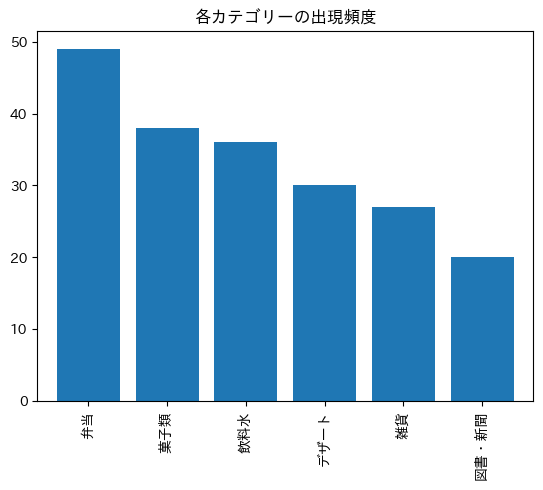

,count,mean,std,min,25%,50%,75%,max
商品番号,,,,,,,,
1QJFO8QY,32.0,35.250000,18.461818,0.0,24.0,36.0,49.5,60.0
2HSTCDWM,20.0,29.400000,21.137146,0.0,12.0,27.0,48.0,60.0
48XMJXKO,10.0,21.600000,13.326665,0.0,13.5,21.0,30.0,42.0
8T7D5DQA,21.0,25.142857,18.260027,0.0,12.0,36.0,42.0,54.0
MESUDVWQ,17.0,43.764706,18.219253,0.0,42.0,48.0,54.0,60.0
QRMOGNUU,27.0,33.111111,16.588535,6.0,21.0,36.0,48.0,60.0
S6RE8W6X,20.0,33.300000,21.631118,0.0,12.0,39.0,54.0,60.0
X0ZE2ZMY,14.0,21.857143,21.901377,0.0,1.5,15.0,39.0,60.0
YY4HAAZR,17.0,31.764706,18.095336,0.0,18.0,30.0,42.0,60.0


In [ ]:
# pandasで作成したデータフレームからグラフ表示と基本統計量を求めよう
# 1. カテゴリー列の要素(弁当、デザートなど)の出現頻度をカウントして、その結果を棒グラフで表示する
# 2. 商品番号列の商品番号ごとに、注文数の基本統計量を求める

# matplotlibライブラリを読み込む
import matplotlib.pyplot as plt
# pandasライブラリを読み込む（初回のみ）
import pandas as pd
# 日本語設定
#!pip install japanize-matplotlib
import japanize_matplotlib

# csvファイルを読み込む（データフレームとして呼び出される）
df = pd.read_csv('sample_pandas_6.csv')
category_df = pd.read_csv('category.csv')

# 発注データと商品のカテゴリデータをマージする
df = pd.merge(df, category_df[['商品番号', 'カテゴリー']], how='inner', on='商品番号')

# カテゴリー列の要素(弁当、デザートなど)の出現頻度をカウント
count_series = df['カテゴリー'].value_counts()

# その結果を棒グラフで表示
plt.title("各カテゴリーの出現頻度")
ax = count_series.plot(kind='bar', width=0.8)
# x軸の列名を消す（要素は表示される）
ax.set_xlabel('')
plt.show()

# 商品番号列の商品番号ごとに、注文数の基本統計量を求める
df.groupby('商品番号')['注文数'].describe()


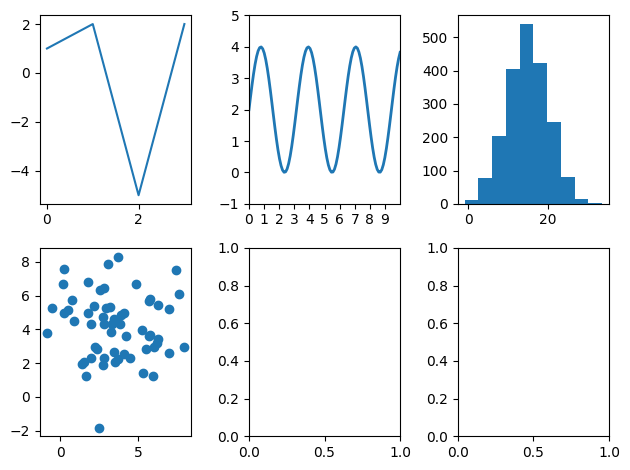

In [ ]:
# Matplotlibで、可視化した複数のグラフを1つの描画キャンパス上で同時に表示しよう
# Matpotlibを利用してデータを可視化して複数のグラフを作成する
# 折れ線グラフ、sin関数、ヒストグラム、散布図のデータを可視化して、グラフや図を1つの描画キャンパス上にまとめて表示する

# NumPyとMatpotlibのライブラリをインポート
import numpy as np
import matplotlib.pyplot as plt

# 6個のグラフを表示する領域を作成 (Figure(描画領域全体)とAxes(ひとつひとつのプロットを描く領域)を作成する)
fig, axes = plt.subplots(2, 3, tight_layout=True)

# 折れ線グラフ
y0 = [1, 2, -5, 2]
axes[0, 0].plot(y0)

# sin関数のプロット
# データを作成
# 0から10までの幅で配列を等間隔に100個作成する
x1 = np.linspace(0, 10, 100)
y1 = 2 + 2 * np.sin(2 * x1)
axes[0, 1].plot(x1, y1, linewidth=2.0)
#axes[0, 1].plot(x1, y1)
axes[0, 1].set(xlim=(0, 10), xticks=np.arange(0, 10),
               ylim=(-1, 5), yticks=np.arange(-1, 6))

# ヒストグラム
# 平均が15, 標準僅差5の標準正規分布から2000個の乱数を生成する
x2 = np.random.normal(15, 5, 2000)
axes[0, 2].hist(x2)

# 散布図
# データを生成する
np.random.seed(3)
x3 = 4 + np.random.normal(0, 2, 60)
y3 = 4 + np.random.normal(0, 2, len(x3))
axes[1, 0].scatter(x3, y3)

plt.show()



In [ ]:
# 課題：NumPyで配列の操作や演算をしよう
# NumPyを利用して、2つの行列の積を計算して結果を表示する
# 計算された行列の要素の最大値を求めて表示する

import numpy as np

# 多次元配列Aを作成
A = np.arange(6).reshape(3, 2)
print(f"Aは{A}です。")

# 多次元配列Bを作成
B = np.arange(8).reshape(2, 4)
print(f"Bは{B}です。")

# AとBの行列の積を計算
Result = np.dot(A, B)
print(f"AとBの行列の積は{Result}です。")

# 計算された行列の要素の最大値を求める
Result2 = np.max(Result)
print(f"計算された行列の要素の最大値は{Result2}です。")


Aは[[0 1]
 [2 3]
 [4 5]]です。
Bは[[0 1 2 3]
 [4 5 6 7]]です。
AとBの行列の積は[[ 4  5  6  7]
 [12 17 22 27]
 [20 29 38 47]]です。
計算された行列の要素の最大値は47です。
